In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import tensorflow.compat.v1 as tf
try:
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    pass

**Obtain 3D Segmentation Data**

In [5]:
from utils import get_3d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_3d_seg_data(path)

print(data.keys())

ri1_range_image = data['ri1_range_image']
ri1_label = data['ri1_label']

print(f'{ri1_range_image.shape=}')
print(f'{ri1_label.shape=}')
print(f'{data["legend"]=}')

dict_keys(['ri1_label', 'ri2_label', 'ri1_range_image', 'ri2_range_image', 'legend'])
ri1_range_image.shape=(64, 2650, 4)
ri1_label.shape=(64, 2650, 2)
data["legend"]={'label': ['instance id', 'semantic class'], 'range_image': ['range', 'intensity', 'elongation', 'is_in_nlz']}


**Obtain 2D Segmentation Data**

In [6]:
from utils import get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

print(data.keys())
print(data['image'].keys())

ri1_range_image = data['ri1_range_image']
ri1_label = data['ri1_label']
ri1_proj = data['ri1_proj']
cam1 = data['image'][1]
cam4 = data['image'][4]

print(f'{ri1_range_image.shape=}')
print(f'{ri1_label.shape=}')
print(f'{ri1_proj.shape=}')
print(f'{cam1.shape=}')
print(f'{cam4.shape=}')
print(f'{data["legend"]=}')

dict_keys(['image', 'ri1_label', 'ri2_label', 'ri1_range_image', 'ri1_proj', 'ri2_range_image', 'ri2_proj', 'legend'])
dict_keys([1, 2, 4, 3, 5])
ri1_range_image.shape=(64, 2650, 4)
ri1_label.shape=(64, 2650, 2)
ri1_proj.shape=(64, 2650, 6)
cam1.shape=(3, 1280, 1920)
cam4.shape=(3, 886, 1920)
data["legend"]={'label': ['instance id', 'semantic class'], 'range_image': ['range', 'intensity', 'elongation', 'is_in_nlz'], 'image': ['cam id', '(C,H,W)'], 'proj': ['first cam id', 'x', 'y', 'second cam id', 'x', 'y']}


**Plotting Range Image**

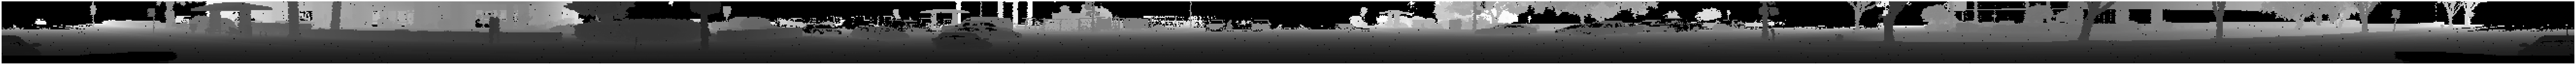

In [7]:
# Individual plot function
from utils import plot_range_image_helper, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

plot_range_image_helper(data['ri1_range_image'][..., 0], vmax=75)

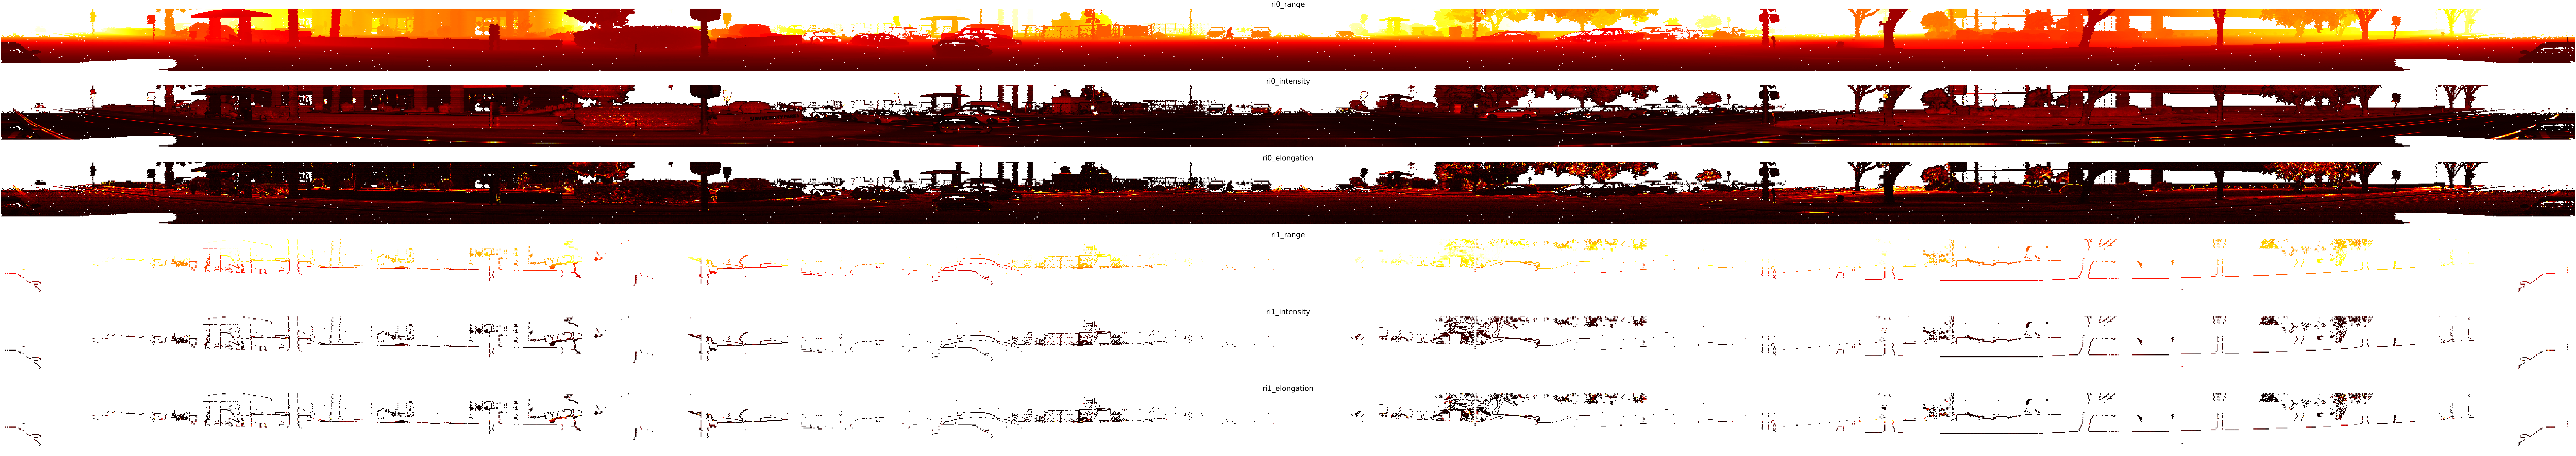

In [8]:
# Plot all range image
from utils import show_range_image_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

show_range_image_data(data, cmap='hot')

**Plot Range Label**

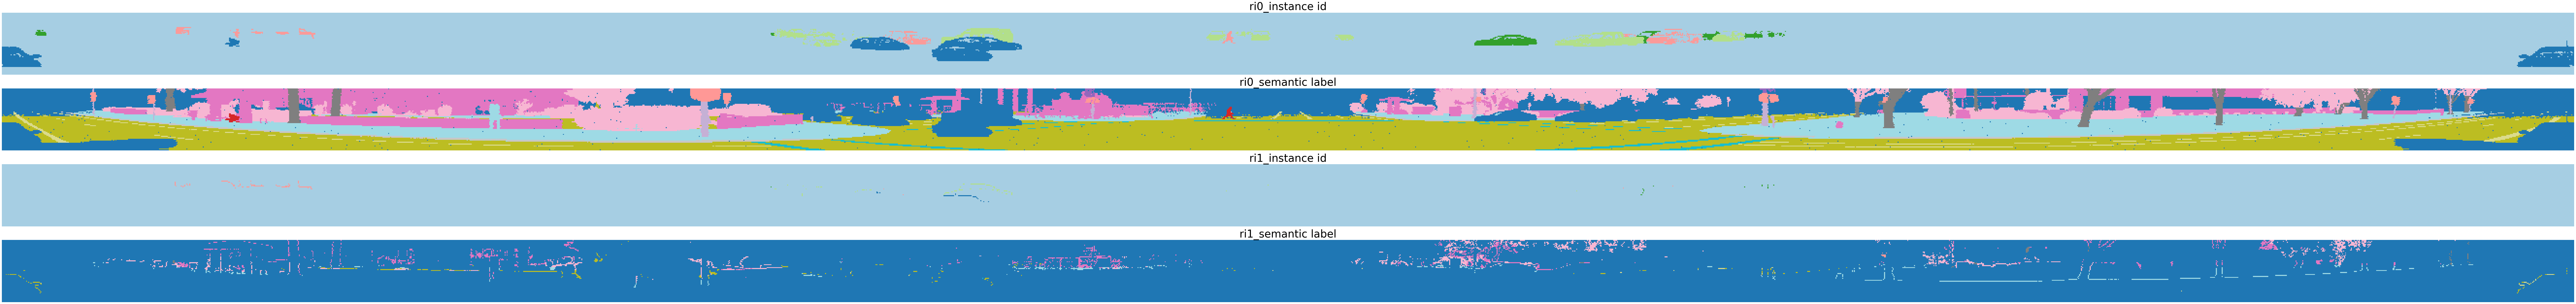

In [9]:
from utils import show_range_image_label, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

show_range_image_label(data)

**Plot Range Camera Projection Region**

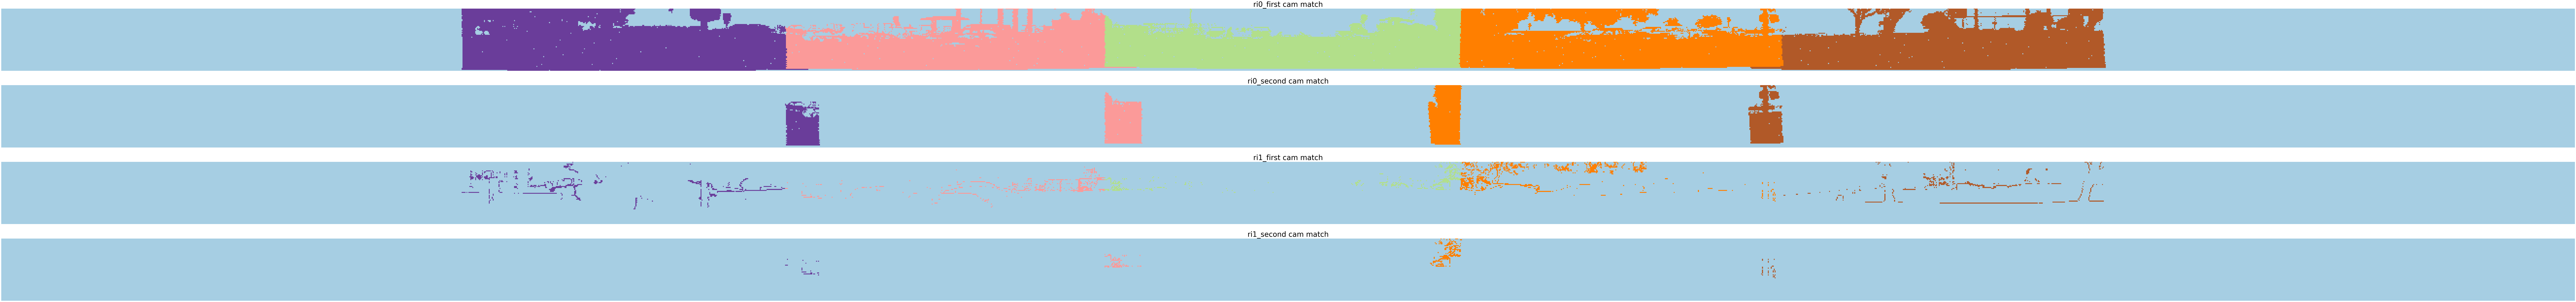

In [10]:
from utils import show_proj_region, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

show_proj_region(data)

**Plot Images**

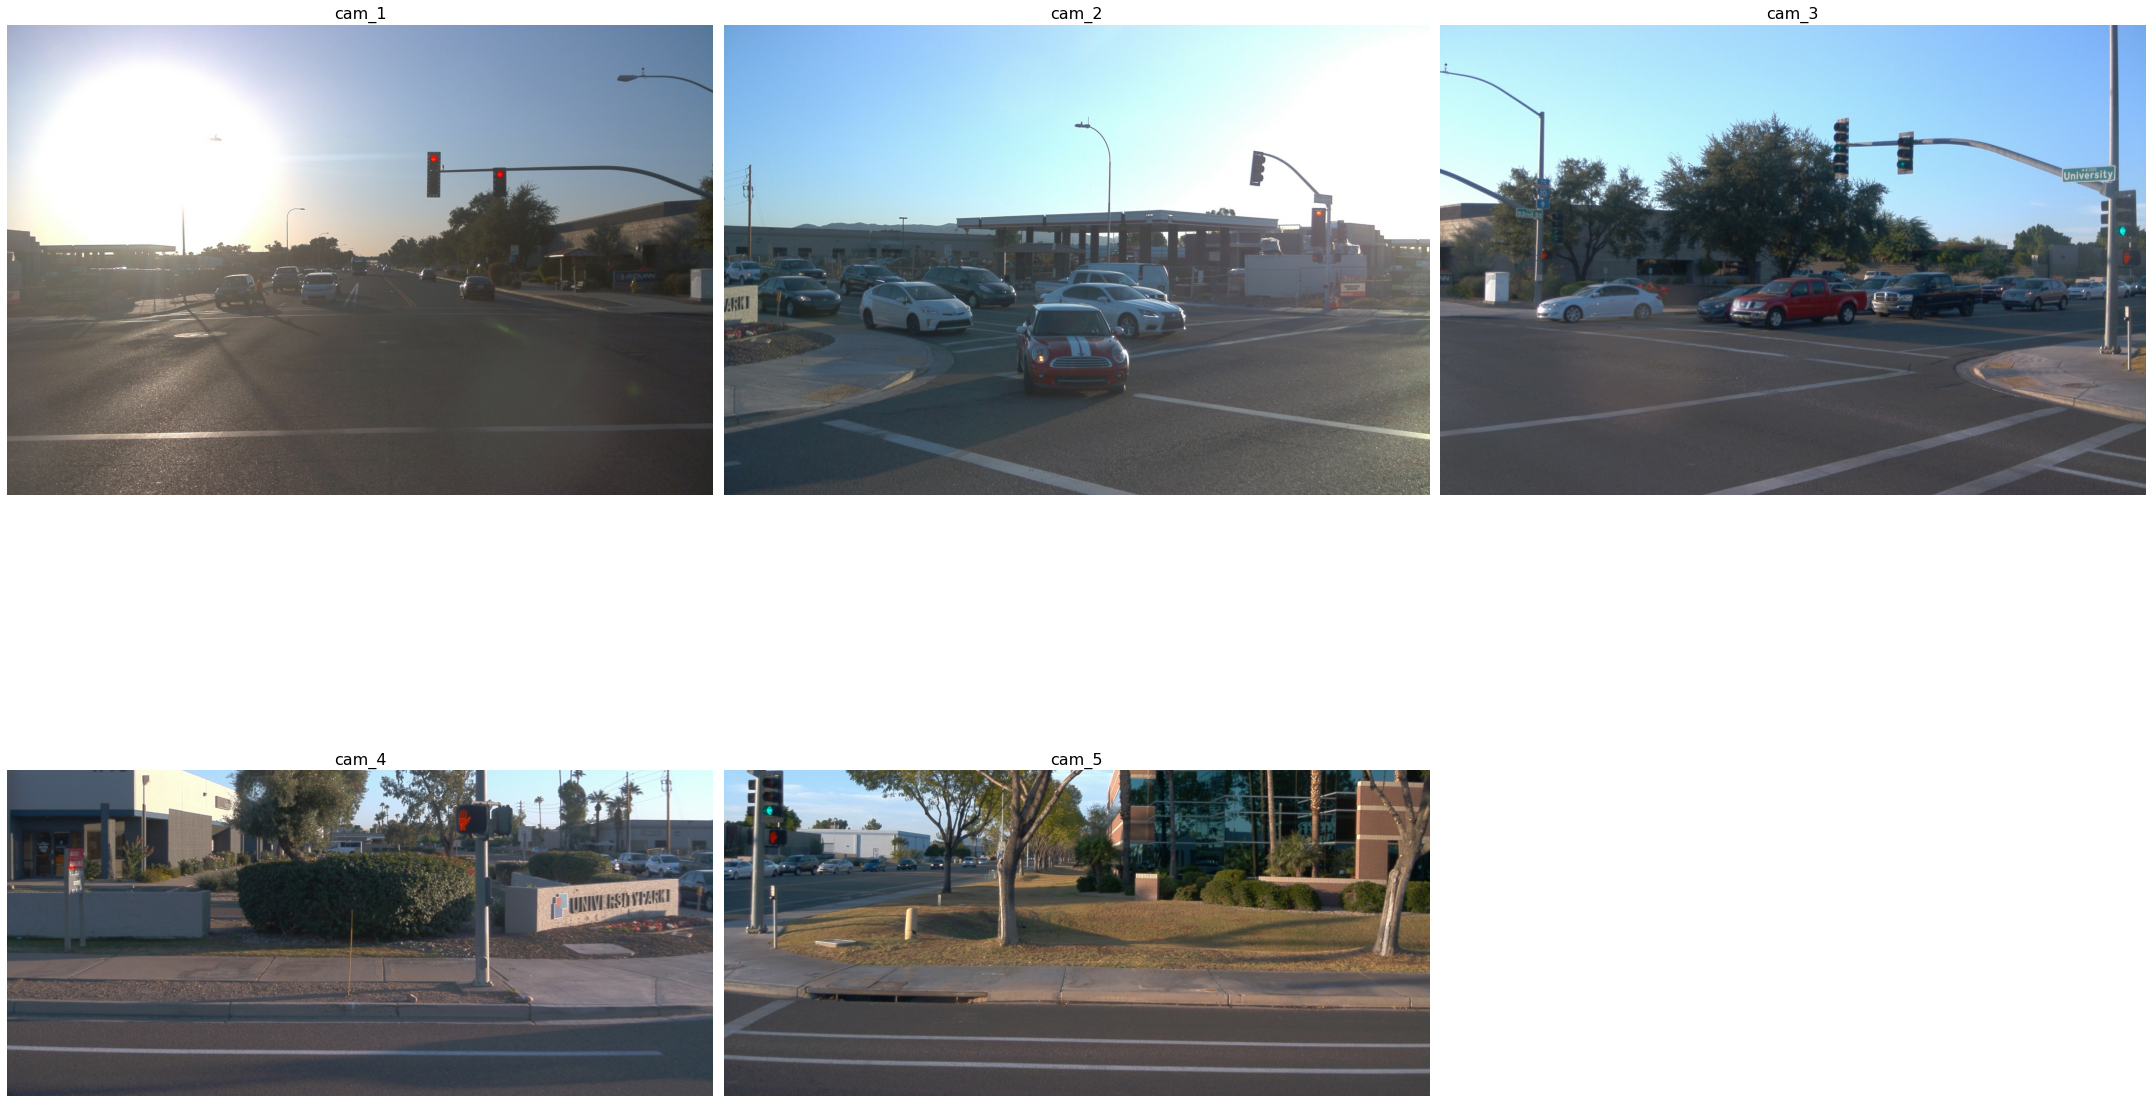

In [11]:
from utils import show_images, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

show_images(data)

**Plot Project Pixel on Range Image**

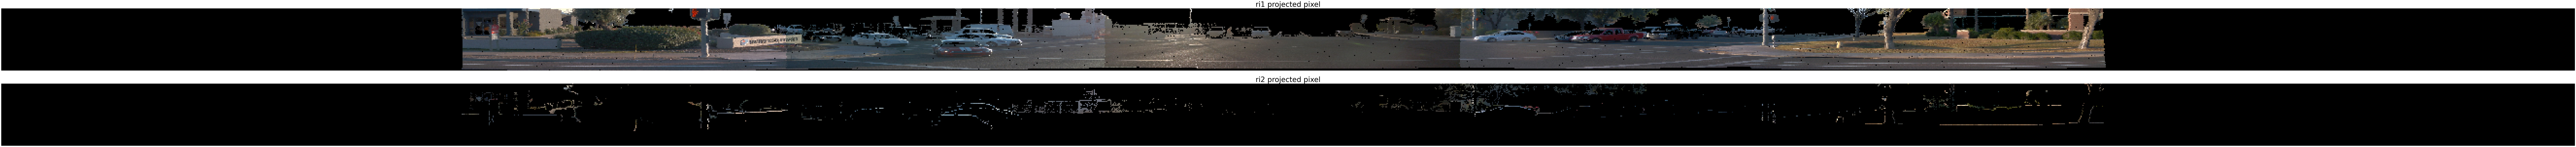

In [12]:
from utils import show_projected_pixel, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

# This function only use the first camera projection
show_projected_pixel(data)

**Use h5 data**

In [13]:
from utils import get_data_h5

path = '/scr/data/h5/train.h5'
data = get_data_h5(path, idx=10)

ri1_range_image = data['ri1_range_image']
ri1_label = data['ri1_label']
ri1_proj = data['ri1_proj']
proj_pixel = data['proj_pixel']
cam1 = data['image'][1]
cam4 = data['image'][4]

print(f'{ri1_range_image.shape=}')
print(f'{ri1_label.shape=}')
print(f'{ri1_proj.shape=}')
print(f'{proj_pixel.shape=}')
print(f'{cam1.shape=}')
print(f'{cam4.shape=}')
print(f'{data["legend"]=}')

ri1_range_image.shape=(64, 2650, 4)
ri1_label.shape=(64, 2650, 2)
ri1_proj.shape=(64, 2650, 6)
proj_pixel.shape=(64, 2650, 3)
cam1.shape=(3, 1280, 1920)
cam4.shape=(3, 886, 1920)
data["legend"]={'label': ['instance id', 'semantic class'], 'range_image': ['range', 'intensity', 'elongation', 'is_in_nlz'], 'image': ['cam id', '(C,H,W)'], 'proj': ['first cam id', 'x', 'y', 'second cam id', 'x', 'y'], 'proj_pixel': ['R', 'G', 'B']}


**Extract label to text file from tfrecord**

In [ ]:
from utils import extract_3d_seg_frames

test_dir = 'PATH/TO/TEST/DATA'
train_dir = 'PATH/TO/TRAIN/DATA'
val_dir = 'PATH/TO/VAL/DATA'

test_txt = 'PATH/TO/EXTRACT/TEST/TXT'
train_txt = 'PATH/TO/EXTRACT/TRAIN/TXT'
val_txt = 'PATH/TO/EXTRACT/VAL/TXT'

extract_3d_seg_frames(test_dir, test_txt)
extract_3d_seg_frames(train_dir, train_txt)
extract_3d_seg_frames(val_dir, val_txt)

**tfrecord to h5**

In [ ]:
from utils import tfrecord_to_h5

test_h5 = '/scr/data/h5/test.h5'
test_dir = '/scr/data/testing'
test_txt = '/deep2/u/yma42/win-self-driving/docs/3d_semseg_test_set_frames.txt'

train_h5 = '/scr/data/h5/train.h5'
train_dir = '/scr/data/training'
train_txt = '/deep2/u/yma42/win-self-driving/docs/3d_semseg_train_set_frames.txt'

val_h5 = '/scr/data/h5/validate.h5'
val_dir = '/scr/data/validation'
val_txt = '/deep2/u/yma42/win-self-driving/docs/3d_semseg_val_set_frames.txt'


tfrecord_to_h5(test_txt, test_h5, test_dir, test=True)
tfrecord_to_h5(train_txt, train_h5, train_dir)
tfrecord_to_h5(val_txt, val_h5, val_dir)

**Test**

/afs/cs.stanford.edu/u/yma42/.conda/envs/seg3d/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


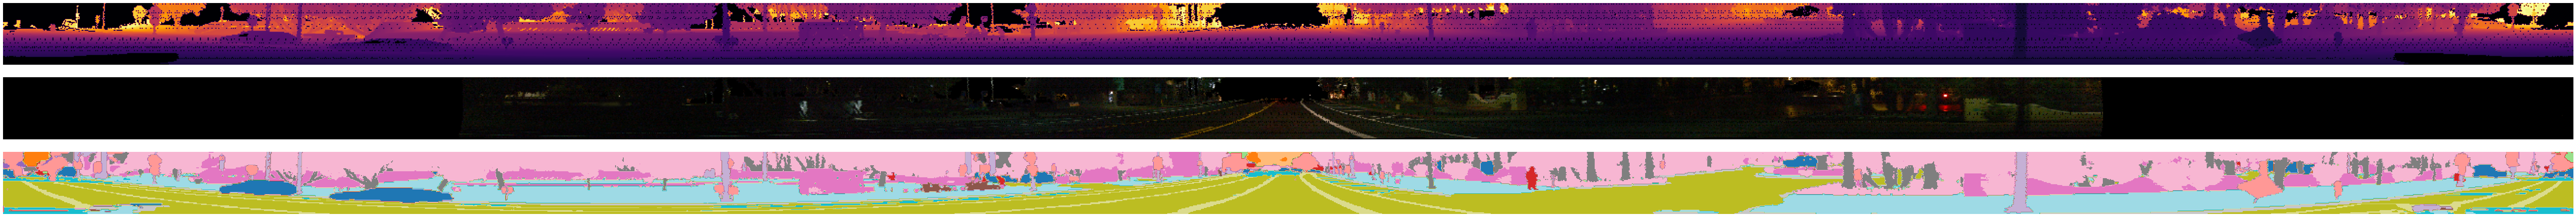

In [1]:
from tasks import load_model
from data import H5Dataset
from tasks.utils import log_spherical_image_helper
import torch

test_h5_path = 'PAHT/TO/H5/DATASET'
models = load_model(test_h5_path)
model = models['spherical_model']
model.eval()

h5_path = '/scr/data/h5/test.h5'
key2load = ['range_image', 'proj_pixel']

dset = H5Dataset(h5_path, key2load)
data_loader = torch.utils.data.DataLoader(dset, shuffle=True, batch_size=1, num_workers=1)

for batch in data_loader:
    break
proj_pixel = batch['proj_pixel']
x = batch['range_image']
y = model(x)

pred = y.argmax(dim=1)

fig = log_spherical_image_helper([x[0][0], proj_pixel[0].clone().movedim(0, -1), pred[0]], [0, 0, 0], [1, 1, 22], cmap=['inferno', 'inferno', 'tab20'])